In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import seaborn as sns

In [89]:
csv_data = pd.read_csv("C:\Test\country.csv", thousands = ',',encoding='cp949', skiprows = 1)
csv_data.head()

,지역,국가,운항(편),여객(명),화물(톤)
0,전체 합계,NaN,91714,9815393,1658148
1,일본,일본,12044,1541437,147108
2,중국,중국,9784,203239,217587
3,소계:아시아,NaN,33231,4473827,487265
4,아시아,네팔,97,10627,965


In [90]:
csv_data

,지역,국가,운항(편),여객(명),화물(톤)
0,전체 합계,NaN,91714,9815393,1658148
1,일본,일본,12044,1541437,147108
2,중국,중국,9784,203239,217587
3,소계:아시아,NaN,33231,4473827,487265
4,아시아,네팔,97,10627,965
...,...,...,...,...,...
68,기타,이스라엘,5,606,60
69,기타,이집트,0,0,0
70,기타,카타르,574,115146,27093
71,기타,케냐,0,0,0


In [101]:
new_data = csv_data.dropna(axis=0)
new_data

,지역,국가,운항(편),여객(명),화물(톤)
1,일본,일본,12044,1541437,147108
2,중국,중국,9784,203239,217587
4,아시아,네팔,97,10627,965
5,아시아,대만,3003,138595,50519
6,아시아,라오스,244,28909,702
...,...,...,...,...,...
68,기타,이스라엘,5,606,60
69,기타,이집트,0,0,0
70,기타,카타르,574,115146,27093
71,기타,케냐,0,0,0


In [103]:
new_data['counter'] = 1
group = new_data.groupby(new_data['지역'])['counter', '운항(편)', '여객(명)'].sum().reset_index()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_27224\3840025253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['counter'] = 1
C:\Users\Administrator\AppData\Local\Temp\ipykernel_27224\3840025253.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group = new_data.groupby(new_data['지역'])['counter', '운항(편)', '여객(명)'].sum().reset_index()


In [104]:
group

,지역,counter,운항(편),여객(명)
0,기타,12,1684,386737
1,대양주,5,3540,589456
2,미주,4,22369,1633506
3,아시아,18,33231,4473827
4,유럽,26,9062,987191
5,일본,1,12044,1541437
6,중국,1,9784,203239


In [109]:
hap = group.loc[[3,5,6]].sum()
hap

지역         아시아일본중국
counter         20
운항(편)        55059
여객(명)      6218503
dtype: object

In [118]:
group.drop([3,5,6], axis = 0, inplace = True)

In [116]:
group.loc['3'] = ['아시아', 20,55059, 6218503]

In [119]:
group

,지역,counter,운항(편),여객(명)
0,기타,12,1684,386737
1,대양주,5,3540,589456
2,미주,4,22369,1633506
4,유럽,26,9062,987191
3,아시아,20,55059,6218503


<function matplotlib.pyplot.show(close=None, block=None)>

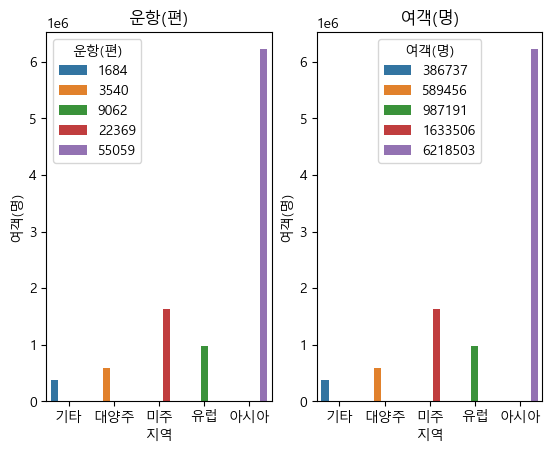

In [139]:
plt.subplot(1,2,1)
sns.barplot(data = group, x = "지역", y= "여객(명)", hue="운항(편)")
plt.title('운항(편)')
plt.subplot(1,2,2)
sns.barplot(data = group, x = "지역", y= "여객(명)", hue="여객(명)")
plt.title('여객(명)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

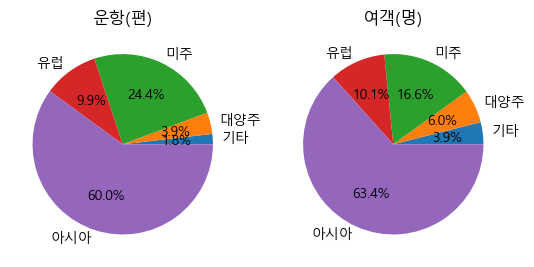

In [151]:

plt.subplot(1,2,1)
plt.pie(group['운항(편)'], labels=group['지역'], autopct='%.1f%%')
plt.title('운항(편)')
plt.subplot(1,2,2)
plt.pie(group['여객(명)'], labels=group['지역'], autopct='%.1f%%')
plt.title('여객(명)')
plt.show

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27224\1073779335.py:7: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()


<function matplotlib.pyplot.show(close=None, block=None)>

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


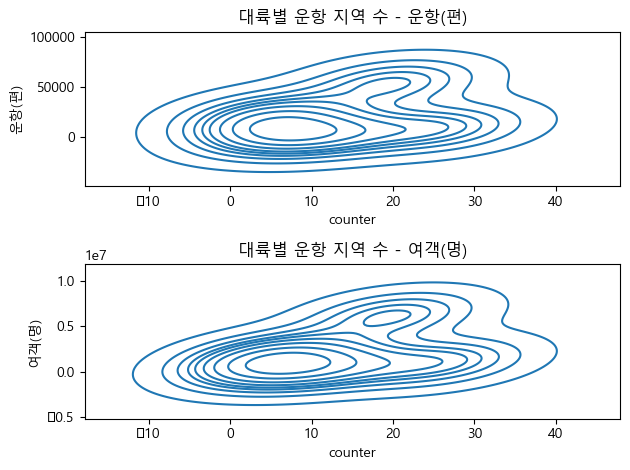

In [143]:
plt.subplot(2,1,1)
sns.kdeplot(x=group['counter'], y=group['운항(편)'])
plt.title('대륙별 운항 국가 수 - 운항(편)')
plt.subplot(2,1,2)
sns.kdeplot(x=group['counter'], y=group['여객(명)'])
plt.title('대륙별 운항 국가 수 - 여객(명)')
plt.tight_layout()
plt.show

In [ ]:
############

In [175]:
#!pip install folium

     -------------------------------------- 102.3/102.3 kB 5.8 MB/s eta 0:00:00


In [1]:
import folium
from folium import plugins

In [2]:
map = folium.Map()
map

map.save('world.html')

In [3]:
#circle
folium.CircleMarker(
    location = [32.204890,95.291089],
    radius = 50, #원 크기
    color = '#fffgg',
    fill_color = '#fffggg',
    popup = '아시아'
).add_to(map)

folium.CircleMarker(
    location = [33.347821,-84.160157],
    radius = 30, #원 크기
    color = '#fffgg',
    fill_color = '#fffggg',
    popup = '미주'
).add_to(map)

folium.CircleMarker(
    location = [56.322701,14.609031],
    radius = 20, #원 크기
    color = '#fffgg',
    fill_color = '#fffggg',
    popup = '유럽'
).add_to(map)

folium.CircleMarker(
    location = [-27.264829,148.599461],
    radius = 15, #원 크기
    color = '#fffgg',
    fill_color = '#fffggg',
    popup = '대양주'
).add_to(map)



map